In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
import os, sys
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [3]:
def display_images(orig, restored):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    ax1.imshow(orig); ax1.set_title('Noisy Input'); ax1.axis('off')
    ax2.imshow(restored); ax2.set_title('Restored Output'); ax2.axis('off')
    plt.show()

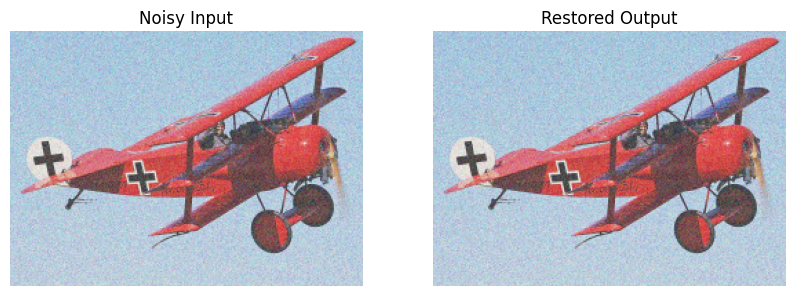

In [ ]:
noisy_path = Path('..','Data', 'Transformed', 'Noise', 'Fokker-Dr.-I_add_noise_mean0p15_var0p1.jpg')
noisy = cv2.imread(noisy_path, cv2.IMREAD_COLOR_RGB)
#noisy = cv2.imread(noisy_path, cv2.IMREAD_GRAYSCALE)
downscale_factor = 0.5
noisy = cv2.resize(
    noisy,
    (0, 0),
    fx=downscale_factor,
    fy=downscale_factor,
    interpolation=cv2.INTER_AREA
)
if noisy is None:
    raise FileNotFoundError(f"Cannot load image at {noisy_path}")
# Display noisy input
display_images(noisy, noisy)

In [ ]:
import numpy as np
from MarkovObjects.GibbsEstimator import (
    LpLoss, LorentzianLoss, SparseGradientPrior,
    WindowPatternTerm, GridMRF, GibbsSampler
)

# pick your loss, prior and (optional) window
loss = LorentzianLoss(sigma=1)
prior = SparseGradientPrior(p=1)
window = WindowPatternTerm(noisy, window_size=3, n_components=5)

# build the MRF
mrf = GridMRF(noisy, loss, prior,
              lambda_r=1, window_term=None, lambda_w=1)


In [16]:
# run Gibbs
sampler = GibbsSampler(mrf, num_iter=80, burn_in=40, verbose=True, estimate_mode='map')
sampler.fit_optimised(parallel_channels=True, shuffle_pixels=True)
denoised = sampler.estimate()

[Channel 0][Iter 10] Loss=3635.36, Energy=8209.06
[Channel 2][Iter 10] Loss=4138.41, Energy=9325.16
[Channel 1][Iter 10] Loss=4088.37, Energy=9465.04
[Channel 2][Iter 20] Loss=4131.08, Energy=9269.97
[Channel 0][Iter 20] Loss=3626.61, Energy=8146.14
[Channel 1][Iter 20] Loss=4080.63, Energy=9403.79
[Channel 2][Iter 30] Loss=4128.63, Energy=9245.62
[Channel 0][Iter 30] Loss=3624.18, Energy=8124.77
[Channel 1][Iter 30] Loss=4078.26, Energy=9376.29
[Channel 2][Iter 40] Loss=4128.17, Energy=9235.57
[Channel 0][Iter 40] Loss=3622.61, Energy=8110.45
[Channel 1][Iter 40] Loss=4076.42, Energy=9359.41
[Channel 2][Iter 50] Loss=4127.18, Energy=9223.28
[Channel 0][Iter 50] Loss=3621.09, Energy=8097.49
[Channel 1][Iter 50] Loss=4075.24, Energy=9348.84
[Channel 2][Iter 60] Loss=4126.87, Energy=9218.59
[Channel 0][Iter 60] Loss=3621.08, Energy=8094.26
[Channel 1][Iter 60] Loss=4074.86, Energy=9341.49
[Channel 2][Iter 70] Loss=4126.44, Energy=9211.04
[Channel 0][Iter 70] Loss=3620.44, Energy=8088.02


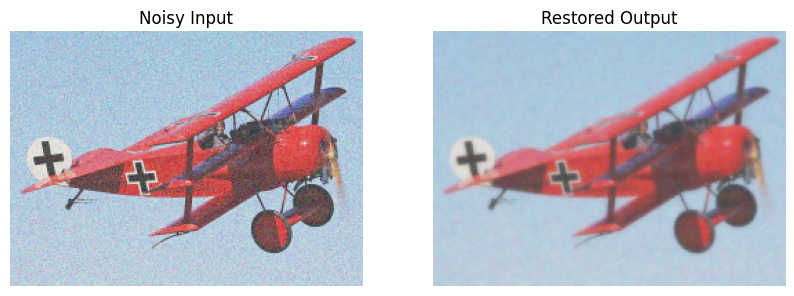

In [17]:
display_images(noisy, denoised)